# Análisis de sentimientos

Usando **VADER** (Valence Aware Dictionary and sEntiment Reasoner).

Los resultados son un diccionario con cuatro valores: **neg** para negativo, **neu** para neutro, **pos** para positivo, y **compound** que es una puntuación compuesta que combina los otros tres puntajes.

In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
texto = "NLTK is a leading platform for building Python programs that work with human language data."
valor_sentimiento = sia.polarity_scores(texto)

print(valor_sentimiento)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
texto = "Wow, NLTK is really powerful!"
valor_sentimiento = sia.polarity_scores(texto)
print(valor_sentimiento)


{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}


## Visualización

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


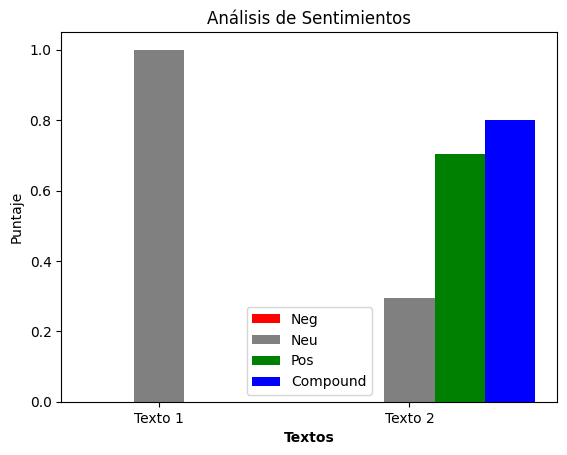

In [3]:
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

textos = [
    "NLTK is a leading platform for building Python programs that work with human language data.",
    "Wow, NLTK is really powerful!"
]

sentimientos = [sia.polarity_scores(texto) for texto in textos]
negativos = [s['neg'] for s in sentimientos]
neutros = [s['neu'] for s in sentimientos]
positivos = [s['pos'] for s in sentimientos]
compuestos = [s['compound'] for s in sentimientos]

etiquetas = ['Texto 1', 'Texto 2']
barWidth = 0.2
r1 = range(len(compuestos))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
plt.bar(r1, negativos, color='red', width=barWidth, label='Neg')
plt.bar(r2, neutros, color='grey', width=barWidth, label='Neu')
plt.bar(r3, positivos, color='green', width=barWidth, label='Pos')
plt.bar(r4, compuestos, color='blue', width=barWidth, label='Compound')
plt.xlabel('Textos', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(compuestos))], etiquetas)
plt.ylabel('Puntaje')
plt.title('Análisis de Sentimientos')
plt.legend()

# Mostrar la gráfica
plt.show()

## Tweets

In [4]:
import nltk
nltk.download('twitter_samples')

tweets = [t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings()]

def es_positive(tweet: str) -> bool:
    return sia.polarity_scores(tweet)["compound"] > 0

for tweet in tweets[:10]:
    print(">", es_positive(tweet), tweet)

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


> False hopeless for tmr :(
> False Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
> False @Hegelbon That heart sliding into the waste basket. :(
> False “@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too
> False Dang starting next week I have "work" :(
> False oh god, my babies' faces :( https//t.co/9fcwGvaki0
> True @RileyMcDonough make me smile :((
> False @f0ggstar @stuartthull work neighbour on motors. Asked why and he said hates the updates on search :( http//t.co/XvmTUikWln
> False why?:("@tahuodyy: sialan:( https//t.co/Hv1i0xcrL2"
> False Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http//t.co/dZZdqmf7Cz


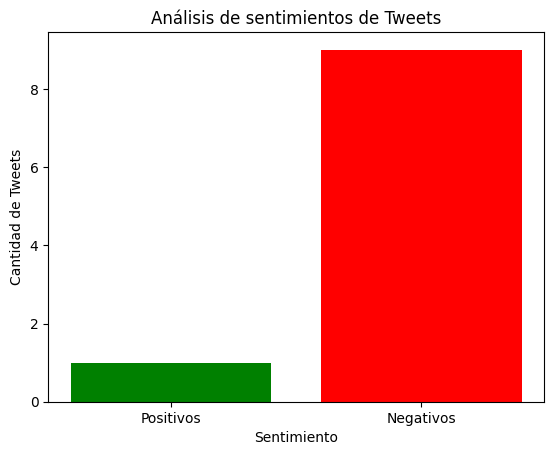

In [5]:
import nltk

import matplotlib.pyplot as plt

tweets = [t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings()]

def es_positivo(tweet: str) -> bool:
    return sia.polarity_scores(tweet)["compound"] > 0

resultados = {"Positivos": 0, "Negativos": 0}
for tweet in tweets[:10]:
    if es_positivo(tweet):
        resultados["Positivos"] += 1
    else:
        resultados["Negativos"] += 1

etiquetas = list(resultados.keys())
conteos = list(resultados.values())
plt.bar(etiquetas, conteos, color=['green', 'red'])
plt.title('Análisis de sentimientos de Tweets')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.show()
